In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data = "data/city_data.csv"
ride_data = "data/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv("data/city_data.csv")
ride_data_df = pd.read_csv("data/ride_data.csv")

city_data_df.head(), ride_data_df.head()

# Combine the data into a single dataset
merged_df =ride_data_df.merge(city_data_df, left_on='city', right_on='city', how = 'outer')
merged_df.head()



# Display the data table for preview


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


In [2]:
#Group the data by city type

city_count = merged_df.groupby(["city"]).count()["driver_count"]
city_count.head()

city
Amandaburgh      18
Barajasview      22
Barronchester    16
Bethanyland      18
Bradshawfurt     10
Name: driver_count, dtype: int64

In [3]:
# Average Purchase Value
city_fare = merged_df.groupby(["city"]).mean()["fare"]
city_fare.head()

city
Amandaburgh      24.641667
Barajasview      25.332273
Barronchester    36.422500
Bethanyland      32.956111
Bradshawfurt     40.064000
Name: fare, dtype: float64

In [4]:
# Total Purchase Value
city_drivers = merged_df.groupby(["city"]).sum()["driver_count"]
city_drivers.head()

city
Amandaburgh      216
Barajasview      572
Barronchester    176
Bethanyland      396
Bradshawfurt      70
Name: driver_count, dtype: int64

In [5]:
# Total Rides
city_rides = merged_df.groupby(["city"]).count()["ride_id"]
city_rides.head()

city
Amandaburgh      18
Barajasview      22
Barronchester    16
Bethanyland      18
Bradshawfurt     10
Name: ride_id, dtype: int64

In [6]:
city_list = merged_df.drop_duplicates(subset='city', keep='first').set_index('city')['type']
city_list.head()

city
Lake Jonathanshire    Urban
South Michelleport    Urban
Port Samanthamouth    Urban
Rodneyfort            Urban
South Jack            Urban
Name: type, dtype: object

In [7]:
    
citybubble = pd.DataFrame({  "City Type":city_list,
                      "Total Rides": city_rides,
                            "Average Fare": city_fare,
                           "Driver Count": city_drivers 
                           })

citybubble.head()

#Need to insert the city type here rather than the "class type"

,City Type,Total Rides,Average Fare,Driver Count
Amandaburgh,Urban,18,24.641667,216
Barajasview,Urban,22,25.332273,572
Barronchester,Suburban,16,36.422500,176
Bethanyland,Suburban,18,32.956111,396
Bradshawfurt,Rural,10,40.064000,70


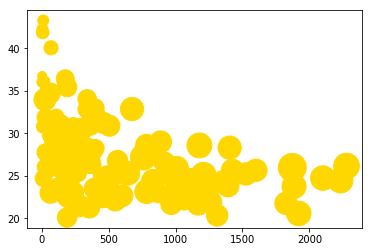

In [8]:

#Need to incorporate the labels and the colors
#Can't figure out how to group them by city type and give each group a color

RCity = citybubble[citybubble["City Type"] == 'Rural']
SCity = citybubble[citybubble['City Type'] == 'Suburban']
UCity = citybubble[citybubble['City Type'] == 'Urban']
 
plt.scatter(x=citybubble['Driver Count'], y=citybubble['Average Fare'], s=citybubble['Total Rides']*20, color = ['gold'])
 

## Bubble Plot of Ride Sharing Data

## Total Fares by City Type

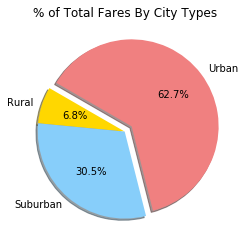

In [9]:
# Calculate Type Percents

city_fares = merged_df.groupby(['type'])['fare'].sum()
# Labels for the sections of our pie chart
labels = ["Rural","Suburban","Urban" ]
colors = ["gold","lightskyblue","lightcoral"]
explode = [0,0,0.1]
shadow = "True"
plt.pie(city_fares, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=150)  
plt.title("% of Total Fares By City Types")
plt.savefig("Total Fares By City Types.png")

plt.show() 

# Build Pie Chart

# Save Figure

##NEED TO COME BACK AND ADD THE STEP TO SAVE THE IMAGE OUT


In [10]:
# Show Figure
plt.show()

## Total Rides by City Type

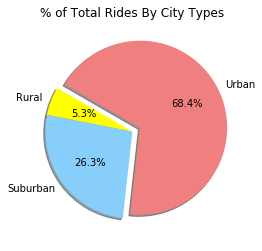

In [11]:
# Calculate Ride Percents


# Calculate Type Percents

city_rides = merged_df.groupby(['type'])['fare'].count()
# Labels for the sections of our pie chart
labels = ["Rural","Suburban","Urban" ]
colors = ["yellow","lightskyblue","lightcoral"]
explode = [0,0,0.1]
plt.pie(city_rides, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=150)  
plt.title("% of Total Rides By City Types")
plt.savefig("Total Rides By City Types.png")

plt.show() 

# Build Pie Chart

# Save Figure


In [12]:
# Show Figure
plt.show()

## Total Drivers by City Type

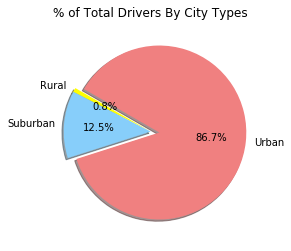

In [13]:
# Calculate Driver Percents

 
city_drivers = merged_df.groupby(['type'])['driver_count'].sum()
# Labels for the sections of our pie chart
labels = ["Rural","Suburban","Urban" ]
colors = ["yellow","lightskyblue","lightcoral"]
explode = [0,0,0.1]
plt.pie(city_drivers, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=150)  
plt.title("% of Total Drivers By City Types")
plt.savefig("Total Drivers By City Types.png")


plt.show() 
# Build Pie Charts

# Save Figure


In [14]:
# Show Figure
plt.show()